<a href="https://colab.research.google.com/github/CodeWithVu/pythonPrograming/blob/main/exercise/w8/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chọn 1 ảnh (.jpg/.jpeg/.png):


Saving 450579.jpg to 450579.jpg
Results saved to /content/runs/segment/person_seg_demo
👥 Số người (mask) phát hiện: 19
💾 Ảnh kết quả lưu tại: /content/runs/segment/person_seg_demo/450579.jpg


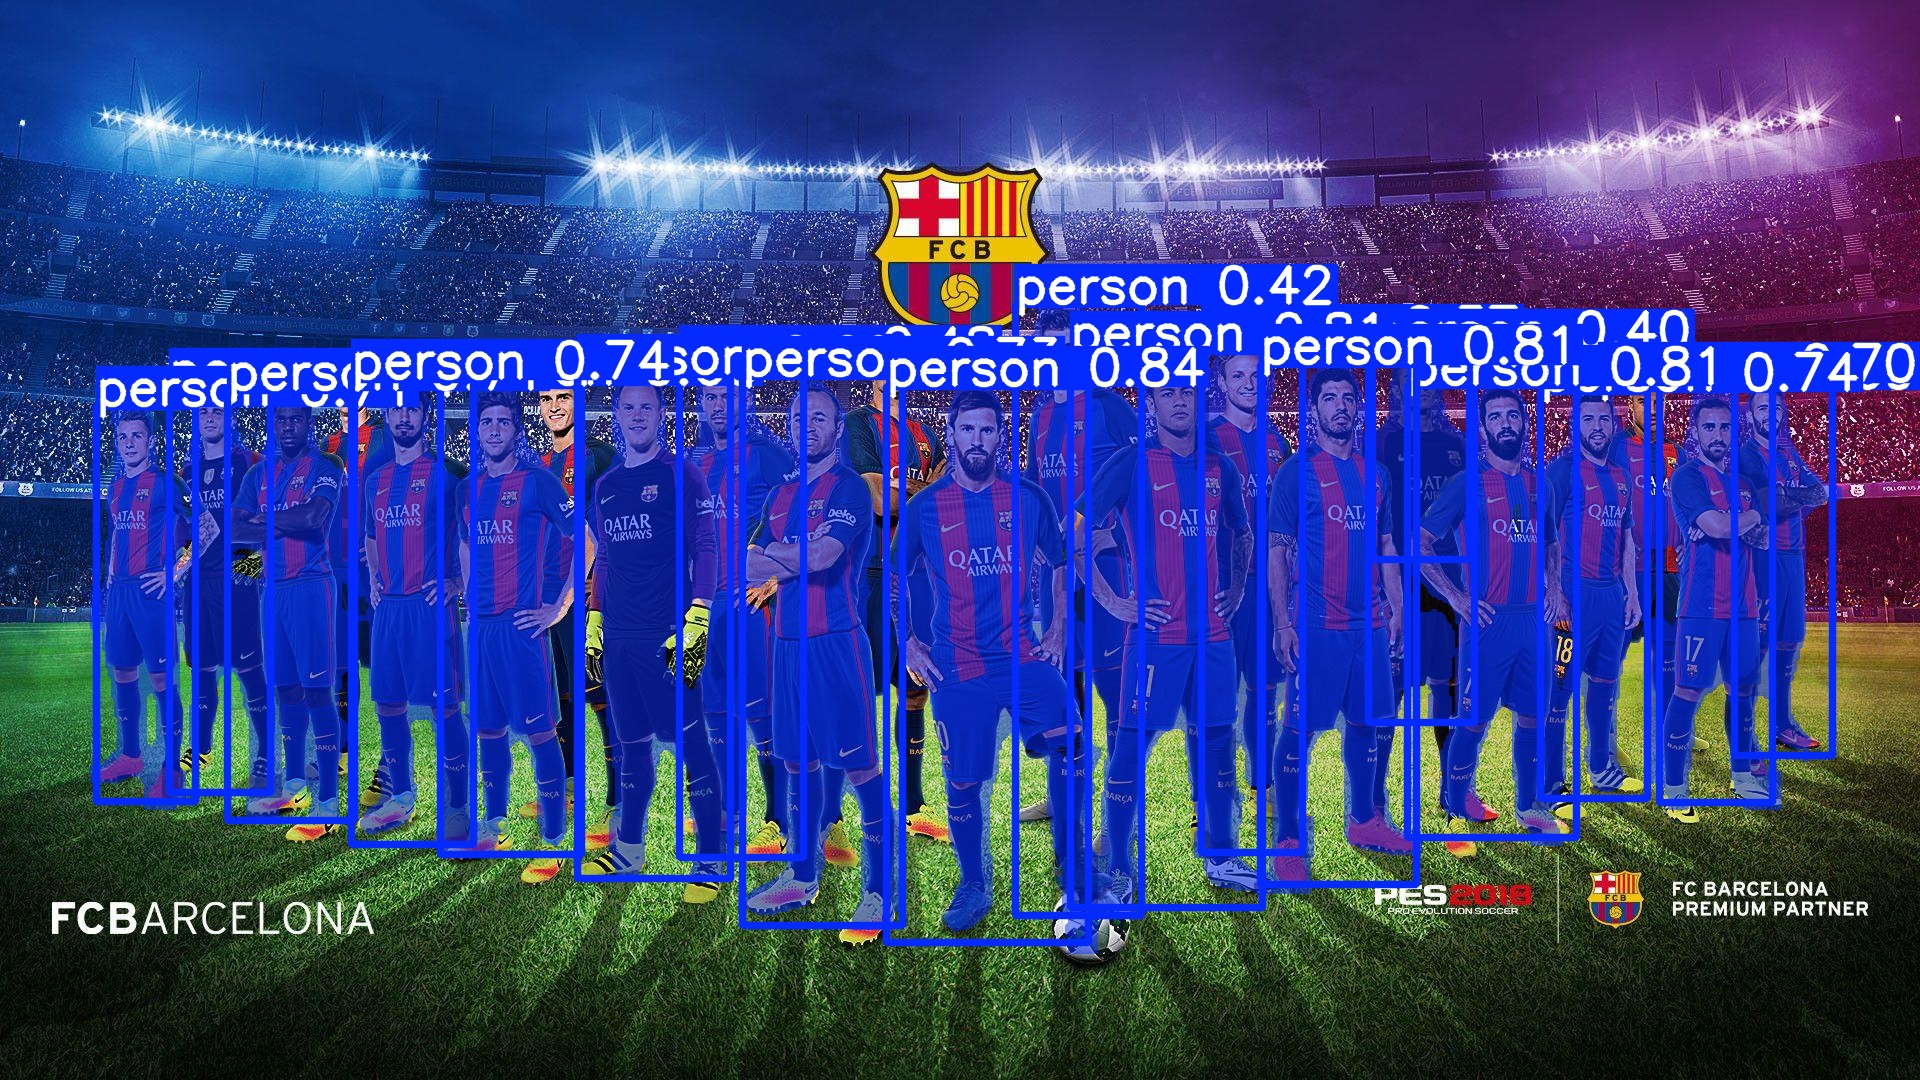

In [2]:
!pip -q install ultralytics pillow

from ultralytics import YOLO
from google.colab import files
from IPython.display import Image as IPyImage, display
from pathlib import Path
import io
from PIL import Image

# 1) Upload ảnh
print("Chọn 1 ảnh (.jpg/.jpeg/.png):")
uploaded = files.upload()
if not uploaded:
    raise SystemExit("❌ Chưa chọn ảnh.")

name, data = next(iter(uploaded.items()))

# Ghi chắc ảnh ra đĩa để Ultralytics lưu kết quả cùng tên
in_path = Path(name)
with open(in_path, "wb") as f:
    f.write(data)

# 2) Load model phân đoạn (segmentation)
model = YOLO("yolov8n-seg.pt")  # nhẹ/nhanh; có masks

# 3) Predict CHỈ người (class 0), lưu file kết quả
out_dir = Path("runs/segment/person_seg_demo")
results = model.predict(
    source=str(in_path),
    classes=[0],       # chỉ "person"
    conf=0.35,
    save=True,         # bắt buộc lưu file đã tô mask
    project="runs/segment",
    name="person_seg_demo",
    exist_ok=True,
    verbose=False
)

# 4) Hiển thị từ file đã lưu (ổn định trên Colab)
r = results[0]
num_people = 0 if r.masks is None else len(r.masks)
saved_img = Path(r.save_dir) / Path(r.path).name

print(f"👥 Số người (mask) phát hiện: {num_people}")
print(f"💾 Ảnh kết quả lưu tại: {saved_img}")

if saved_img.exists():
    display(IPyImage(filename=str(saved_img)))
else:
    # fallback: nếu hiếm khi không thấy file, dùng plot() để hiển thị
    vis_bgr = r.plot()
    vis_rgb = vis_bgr[..., ::-1]
    display(Image.fromarray(vis_rgb))